We are looking into unicorn data which is compiled by CB insights and looking at following things:-

1.The number off Unicorns formed compared to previous years
2.Who are the main investors in startups that turned unicorns this year who stayed invested this year even as increase is interst rates is raising the cost of borrowing money.

Note:- The analysis is based on data till June 2022 only and thus comparisons/calculations across years have been made for first 6 months only.

In [39]:
import pandas as pd

In [41]:
df = pd.read_excel("unicorn_data.xlsx",skiprows= 2)

df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,ByteDance,140.0,2017-04-07,China,Beijing,Internet software & services,"Sequoia Capital China, SIG Asia Investments, Sina Weibo, Softbank Group"
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothenberg Ventures"
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China, Shunwei Capital Partners"
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capital, General Atlantic"


In [43]:
# Converting all the column names into lowercase and also removing spaces in between the names

df.columns = df.columns.str.lower().str.replace(" ", "_")

df.head()

,company,valuation_($b),date_joined,country,city,industry,select_investors
0,ByteDance,140.0,2017-04-07,China,Beijing,Internet software & services,"Sequoia Capital China, SIG Asia Investments, Sina Weibo, Softbank Group"
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothenberg Ventures"
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China, Shunwei Capital Partners"
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capital, General Atlantic"


In [44]:
# removing symbols/characters from the column names

df.columns = df.columns.str.replace("(","")
df.columns = df.columns.str.replace(")","")
df.columns = df.columns.str.replace("$","")



C:\Users\VINEET\AppData\Local\Temp\ipykernel_18108\397329707.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace("(","")
C:\Users\VINEET\AppData\Local\Temp\ipykernel_18108\397329707.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace(")","")
C:\Users\VINEET\AppData\Local\Temp\ipykernel_18108\397329707.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace("$","")


In [45]:
# Checking the size of total dataset
df.shape

(1170, 7)

In [46]:
df.head()

,company,valuation_b,date_joined,country,city,industry,select_investors
0,ByteDance,140.0,2017-04-07,China,Beijing,Internet software & services,"Sequoia Capital China, SIG Asia Investments, Sina Weibo, Softbank Group"
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothenberg Ventures"
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China, Shunwei Capital Partners"
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capital, General Atlantic"


In [47]:
# Checking the data types of the columns:-
df.dtypes

company                     object
valuation_b                float64
date_joined         datetime64[ns]
country                     object
city                        object
industry                    object
select_investors            object
dtype: object

In [48]:
# taking out the month number from the date_joined column and creating a new column:-

df['month'] = df.date_joined.dt.month
df.head()

,company,valuation_b,date_joined,country,city,industry,select_investors,month
0,ByteDance,140.0,2017-04-07,China,Beijing,Internet software & services,"Sequoia Capital China, SIG Asia Investments, Sina Weibo, Softbank Group",4
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothenberg Ventures",12
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China, Shunwei Capital Partners",7
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1
4,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capital, General Atlantic",12


In [49]:
# taking out the year from the dat_joined column and creating a new column:-

df['year'] = df.date_joined.dt.year
df.head()

,company,valuation_b,date_joined,country,city,industry,select_investors,month,year
0,ByteDance,140.0,2017-04-07,China,Beijing,Internet software & services,"Sequoia Capital China, SIG Asia Investments, Sina Weibo, Softbank Group",4,2017
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothenberg Ventures",12,2012
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China, Shunwei Capital Partners",7,2018
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capital, General Atlantic",12,2011


In [10]:
# We will filter out a dataframe with unicorn formation data for months before June in each year(since the latest data for
    #2022 is available till June only).

#We will use this newdataframe (called df_main) to make comparison on unicorns across years


In [51]:
# Forming a new datframe for unicorn information till June of each year:-

df_main = df[df.month <= 6]
df_main.head()

,company,valuation_b,date_joined,country,city,industry,select_investors,month,year
0,ByteDance,140.0,2017-04-07,China,Beijing,Internet software & services,"Sequoia Capital China, SIG Asia Investments, Sina Weibo, Softbank Group",4,2017
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
5,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Matrix Partners",1,2018
6,Checkout.com,40.0,2019-05-02,United Kingdom,London,Fintech,"Tiger Global Management, Insight Partners, DST Global",5,2019
8,Databricks,38.0,2019-02-05,United States,San Francisco,Data management & analytics,"Andreessen Horowitz, New Enterprise Associates, Battery Ventures",2,2019


In [52]:
# checkng the size of this new dataframe which has the unicorn data for first 6 months of any year:-

df_main.shape



(650, 9)

In [53]:
# Yearwise data on the total number of companies that became unicorns during the first 6 months of a year

yearly_unicorns = df_main.year.value_counts().sort_index()
yearly_unicorns

2011      1
2012      2
2013      2
2014      4
2015     13
2016     13
2017     16
2018     41
2019     58
2020     36
2021    254
2022    210
Name: year, dtype: int64

In [54]:
# copying this data to clipboard:-
yearly_unicorns.to_clipboard("yearly_unicorns.xlsx")


In [56]:
# The most common industries in which these companies are involved in:-

unicorn_industry = df_main.groupby(by='year').industry.value_counts()
unicorn_industry.tail(10)

year  industry                       
2022  E-commerce & direct-to-consumer    12
      Artificial intelligence            11
      Auto & transportation               6
      Data management & analytics         6
      Hardware                            6
      Artificial Intelligence             5
      Mobile & telecommunications         4
      Edtech                              3
      Consumer & retail                   1
      Travel                              1
Name: industry, dtype: int64

In [16]:
unicorn_industry.to_clipboard("unicorn_industry.xlsx")


In [59]:
# Countries where  most unicorns were formed during the first 6 months in the last few years 
year_wise = df_main.groupby(by='year').country.value_counts()
year_wise.head()

year  country      
2011  United States    1
2012  Hong Kong        1
      United States    1
2013  United States    2
2014  United States    3
Name: country, dtype: int64

In [19]:
year_wise.to_clipboard("year_wise.xlsx")

In [58]:
df.head()

,company,valuation_b,date_joined,country,city,industry,select_investors,month,year
0,ByteDance,140.0,2017-04-07,China,Beijing,Internet software & services,"Sequoia Capital China, SIG Asia Investments, Sina Weibo, Softbank Group",4,2017
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothenberg Ventures",12,2012
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China, Shunwei Capital Partners",7,2018
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capital, General Atlantic",12,2011


In [60]:
# Arranging the select_investors column for these unicorns:-

# first we split the investors data

df_main['select_investors'] = df_main['select_investors'].str.split(',')
df_main.head()

C:\Users\VINEET\AppData\Local\Temp\ipykernel_18108\3877131000.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['select_investors'] = df_main['select_investors'].str.split(',')


,company,valuation_b,date_joined,country,city,industry,select_investors,month,year
0,ByteDance,140.0,2017-04-07,China,Beijing,Internet software & services,"[Sequoia Capital China, SIG Asia Investments, Sina Weibo, Softbank Group]",4,2017
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"[Khosla Ventures, LowercaseCapital, capitalG]",1,2014
5,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"[Sequoia Capital China, Blackbird Ventures, Matrix Partners]",1,2018
6,Checkout.com,40.0,2019-05-02,United Kingdom,London,Fintech,"[Tiger Global Management, Insight Partners, DST Global]",5,2019
8,Databricks,38.0,2019-02-05,United States,San Francisco,Data management & analytics,"[Andreessen Horowitz, New Enterprise Associates, Battery Ventures]",2,2019


In [61]:
# then we arrange each investor name seperated by comma into a row:-

df_main = df_main.explode('select_investors').reset_index(drop=True)



In [62]:
# Removing white spaces:-
df_main['select_investors'] = df_main['select_investors'].str.strip()


In [63]:
df_main.head(10)

,company,valuation_b,date_joined,country,city,industry,select_investors,month,year
0,ByteDance,140.0,2017-04-07,China,Beijing,Internet software & services,Sequoia Capital China,4,2017
1,ByteDance,140.0,2017-04-07,China,Beijing,Internet software & services,SIG Asia Investments,4,2017
2,ByteDance,140.0,2017-04-07,China,Beijing,Internet software & services,Sina Weibo,4,2017
3,ByteDance,140.0,2017-04-07,China,Beijing,Internet software & services,Softbank Group,4,2017
4,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,Khosla Ventures,1,2014
5,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,LowercaseCapital,1,2014
6,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,capitalG,1,2014
7,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,Sequoia Capital China,1,2018
8,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,Blackbird Ventures,1,2018
9,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,Matrix Partners,1,2018


In [65]:
# Finding out the main investors in companies that became unicorns in 2022.this could help in knowing the primary 
    #investors of such growing startups even in  2022

# 1.We first filter out the unicorn data for year 2022:-

df_invest_2022 = df_main[df_main.year == 2022]
df_invest_2022.head(10)

,company,valuation_b,date_joined,country,city,industry,select_investors,month,year
31,Miro,17.5,2022-01-05,United States,San Francisco,Internet software & services,Accel,1,2022
32,Miro,17.5,2022-01-05,United States,San Francisco,Internet software & services,AltaIR Capital,1,2022
33,Miro,17.5,2022-01-05,United States,San Francisco,Internet software & services,Technology Crossover Ventures,1,2022
76,KuCoin,10.0,2022-05-10,Seychelles,Victoria,Fintech,IDG Capital,5,2022
77,KuCoin,10.0,2022-05-10,Seychelles,Victoria,Fintech,Matrix Partners China,5,2022
78,KuCoin,10.0,2022-05-10,Seychelles,Victoria,Fintech,Jump Crypto,5,2022
167,RELEX,5.7,2022-02-17,Finland,Helsinki,"Supply chain, logistics, & delivery",Blackstone,2,2022
168,RELEX,5.7,2022-02-17,Finland,Helsinki,"Supply chain, logistics, & delivery",Technology Crossover Ventures,2,2022
169,RELEX,5.7,2022-02-17,Finland,Helsinki,"Supply chain, logistics, & delivery",Summit Partners,2,2022
170,The Boring Company,5.7,2022-04-20,United States,Pflugerville,Other,VY Capital,4,2022


In [66]:
#2.finding the top investor names and the number of companies they were invested in that became unicorns in 2022

unicorn_invest_2022 =df_invest_2022.select_investors.value_counts().head(10)
unicorn_invest_2022

Andreessen Horowitz            15
Tiger Global Management        14
Insight Partners               13
Accel                          11
Sequoia Capital                11
General Catalyst               11
Bessemer Venture Partners       9
Lightspeed Venture Partners     8
Bain Capital Ventures           8
Y Combinator                    6
Name: select_investors, dtype: int64

In [30]:
#writing this data to excel
unicorn_invest_2022.to_clipboard("unicorn_invest_2022.xlsx")

<AxesSubplot:>

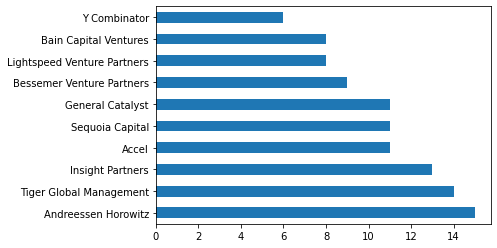

In [67]:
#Plotting a horizontal bar chart of these top investors with the number of unicorn companies they were invested in:-

df_invest_2022.select_investors.value_counts().head(10).plot(kind = "barh")


In [32]:
#The industries where these top investors have invested in 2022:-

In [68]:
# Taking the data for top fives investors who invested in maxmum companies that turned to unicorns in 2022

investors_2022 = df_invest_2022[df_invest_2022.select_investors.isin(["Andreessen Horowitz","Tiger Global Management",
                                                                      "Insight Partners","Accel","Sequoia Capital"])]

investors_2022.head(10)


,company,valuation_b,date_joined,country,city,industry,select_investors,month,year
31,Miro,17.5,2022-01-05,United States,San Francisco,Internet software & services,Accel,1,2022
232,SonarSource,4.7,2022-04-26,Switzerland,Geneva,Internet software & services,Insight Partners,4,2022
300,Yuga Labs,4.0,2022-03-22,United States,Miami,Internet software & services,Andreessen Horowitz,3,2022
304,Abnormal Security,4.0,2022-05-10,United States,San Francisco,Cybersecurity,Insight Partners,5,2022
398,Ironclad,3.2,2022-01-18,United States,Sacramento,Internet software & services,Accel,1,2022
399,Ironclad,3.2,2022-01-18,United States,Sacramento,Internet software & services,Sequoia Capital,1,2022
456,Cross River Bank,3.0,2022-02-11,United States,Fort Lee,Fintech,Andreessen Horowitz,2,2022
551,Games24x7,2.5,2022-03-30,India,Mumbai,Internet software & services,Tiger Global Management,3,2022
555,Coda Payments,2.5,2022-04-15,Singapore,NaN,Fintech,Insight Partners,4,2022
635,PayFit,2.1,2022-01-06,United Kingdom,London,Fintech,Accel,1,2022


In [69]:
#  Finding the industries/sectors where these top investors invested in which produced the unicorns this year 2022.
    # saving this to "invest_indust_2022"

invest_indust_2022= investors_2022.groupby('select_investors').industry.value_counts()
invest_indust_2022

select_investors         industry                           
Accel                    Fintech                                4
                         Internet software & services           4
                         Artificial intelligence                3
Andreessen Horowitz      Internet software & services           7
                         Fintech                                3
                         Cybersecurity                          2
                         Artificial Intelligence                1
                         Data management & analytics            1
                         Health                                 1
Insight Partners         Cybersecurity                          4
                         Internet software & services           4
                         Fintech                                3
                         E-commerce & direct-to-consumer        1
                         Supply chain, logistics, & delivery    1
Sequoia Capital

In [35]:
#writing this to excel:-
invest_indust_2022.to_clipboard("invest_indust_2022.xlsx") 